In [14]:
import celldreamer
import scanpy as sc
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
matplotlib.rcdefaults()

from pathlib import Path
matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

from matplotlib import rcParams

FIGSIZE = (4, 4)
rcParams["figure.figsize"] = FIGSIZE

In [15]:
real_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed_full_genome/hlca_core/hlca_core_test.h5ad") 
real_tabula = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed_full_genome/tabula_muris/tabula_muris_test.h5ad")

In [16]:
cf_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/generated/hlca_core/generated_cells_0.h5ad")
cf_tabula = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/generated/tabula_muris/generated_cells_0.h5ad")

# scvi_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scvi/hlca_core/generated/hlca_core_0.h5ad")
# scvi_tabula = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scvi/tabula_muris/generated/tabula_muris_0.h5ad")

# scdiff_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scDiffusion/generated/hlca_core/generated_cells_0.h5ad")
# scdiff_tabula = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scDiffusion/generated/tabula_muris/generated_cells_0.h5ad")

In [17]:
# def merge_and_plot(adata_real, adata_generated, cluster, name):
#     adata = sc.AnnData(X=np.concatenate([adata_real.X.A, adata_generated.layers["X_counts"]], axis=0))
#     obs = pd.DataFrame({"dataset_type": ["Real" for _ in range(len(adata_real))] + ["Generated" for _ in range(len(adata_generated))]})
#     obs["cell type"] = np.concatenate([adata_real.obs[cluster], adata_generated.obs[cluster]])
#     adata.obs=obs
#     sc.pp.normalize_total(adata, target_sum=1e4)
#     sc.pp.log1p(adata)
#     sc.tl.pca(adata)
#     sc.pp.neighbors(adata)
#     sc.tl.umap(adata)

#     colors = plt.cm.Paired.colors
#     sc.pl.umap(adata, color="dataset_type", palette=plt.cm.Set1.colors)

def merge_and_plot(adata_real, adata_generated, cluster, name):
    adata = sc.AnnData(X=np.concatenate([adata_real.X.A, adata_generated.X.A], axis=0))
    obs = pd.DataFrame({"dataset_type": ["Real" for _ in range(len(adata_real))] + ["Generated" for _ in range(len(adata_generated))]})
    obs["cell type"] = np.concatenate([adata_real.obs[cluster], adata_generated.obs[cluster]])
    adata.obs=obs
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)

    colors = plt.cm.Paired.colors
    sc.pl.umap(adata, color="dataset_type", palette=plt.cm.Set1.colors)

In [18]:
sc.pp.subsample(real_hlca, 0.25)
sc.pp.subsample(real_tabula, 0.25)

# cellFlow

In [19]:
sc.pp.subsample(real_hlca,0.25)
sc.pp.subsample(cf_hlca,0.25)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


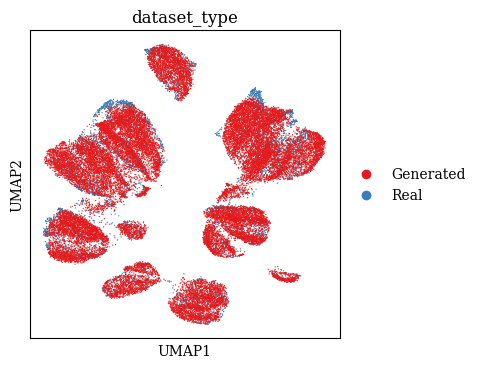

In [20]:
merge_and_plot(real_hlca, cf_hlca, "cell_type", "HLCA")

In [21]:
del cf_hlca

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


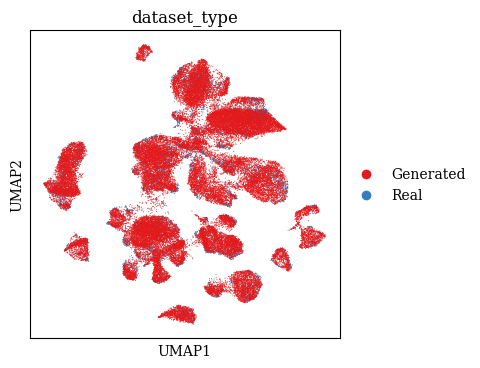

In [22]:

merge_and_plot(real_tabula, cf_tabula, "tissue", "HLCA")

In [23]:
del cf_tabula

# scvi

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


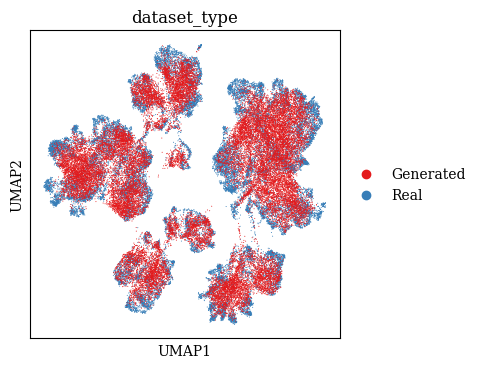

In [29]:
sc.pp.subsample(scvi_hlca,0.25)
merge_and_plot(real_hlca, scvi_hlca, "cell_type", "HLCA")
del scvi_hlca


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


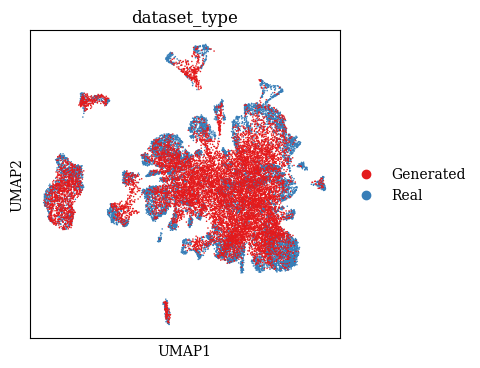

In [30]:
sc.pp.subsample(scvi_tabula,0.25)
merge_and_plot(real_tabula, scvi_tabula, "tissue", "HLCA")
del scvi_tabula

# scDiffusion

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


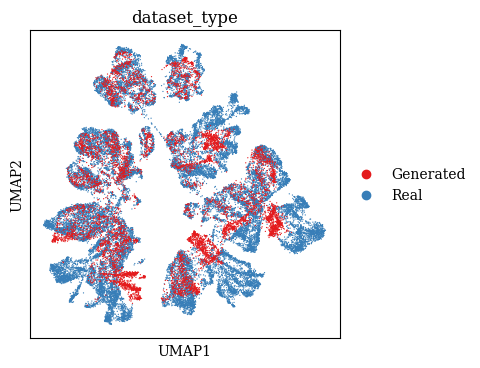

In [34]:
sc.pp.subsample(scdiff_hlca,0.25)
merge_and_plot(real_hlca, scdiff_hlca, "cell_type", "HLCA")
del scdiff_hlca

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


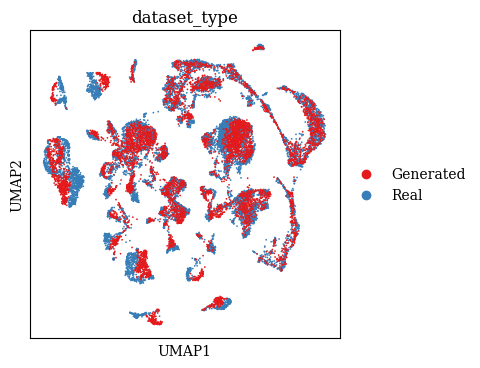

In [36]:
sc.pp.subsample(scdiff_tabula,0.25)
merge_and_plot(real_tabula, scdiff_tabula, "tissue", "HLCA")
del scdiff_tabula